:) same_train_test_data = False
:) Please note that since we hold out 30.0% of our 100 samples for testing, we have:
:) X_train = 70 rows (samples) and 6 columns (N = 6 predictors) for training.
:) X_test = 30 rows (samples) and 6 columns (N = 6 predictors) for testing.
:) y_train = 70 corresponding rows (samples) for training.
:) y_test = 30 corresponding rows (samples) for testing.


100%|██████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 6000.43it/s]

using alpha_lasso default of 0.01


NetREmModel(verbose=False, overlapped_nodes_only=False, all_pos_coefs=False, model_type=Lasso, use_network=True, fit_y_intercept=False, max_lasso_iterations=10000, view_network=True, tolerance=0.0001, lasso_selection=cyclic, beta_network=3, network=<PriorGraphNetwork.PriorGraphNetwork object at 0x000002A622365240>)

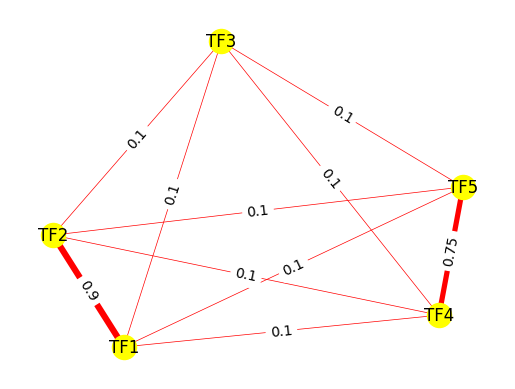

In [2]:
from packages_needed import *
import error_metrics as em 
from packages_needed import *
import Netrem_model_builder as nm
import DemoDataBuilderXandY as demo
import PriorGraphNetwork as graph
import netrem_evaluation_functions as nm_eval
import essential_functions as ef

dummy_data = demo.generate_dummy_data(corrVals = [0.9, 0.5, 0.1, -0.2, -0.8, -0.3],
                   num_samples_M = 100,
                   train_data_percent = 70)

X_df = dummy_data.X_df
X_df.head()

y_df = dummy_data.y_df
y_df.head()

# 70 samples for training data (used to train and fit GRegulNet model)
X_train = dummy_data.view_X_train_df()
y_train = dummy_data.view_y_train_df()

# 30 samples for testing data
X_test = dummy_data.view_X_test_df()
y_test = dummy_data.view_y_test_df()

# prior network edge_list:
edge_list = [["TF1", "TF2", 0.9], ["TF4", "TF5", 0.75], ["TF1", "TF3"], ["TF1", "TF4"], ["TF1", "TF5"], 
              ["TF2", "TF3"], ["TF2", "TF4"], ["TF2", "TF5"], ["TF3", "TF4"], ["TF3", "TF5"]]

beta_network_val = 3 
# by default, cv_for_alpha is False, so alpha_lasso_val will be specified for the alpha_lasso parameter.
alpha_lasso_val = 0.01

# Building the network regularized regression model: 
# Please note: To include nodes found in the gene expression data that are not found in the PPI Network (e.g. TF6 in our case), we use False for the overlapped_nodes_only argument (otherwise, we would only use TFs 1 to 5):
netrem_demo = nm.netrem(edge_list = edge_list, 
                        beta_net = beta_network_val,
                        alpha_lasso = alpha_lasso_val,
                        overlapped_nodes_only = False, # so we include TF6
                        view_network = True)
netrem_demo

:) same_train_test_data = False
:) Please note that since we hold out 30.0% of our 100 samples for testing, we have:
:) X_train = 70 rows (samples) and 6 columns (N = 6 predictors) for training.
:) X_test = 30 rows (samples) and 6 columns (N = 6 predictors) for testing.
:) y_train = 70 corresponding rows (samples) for training.
:) y_test = 30 corresponding rows (samples) for testing.


100%|██████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 5993.29it/s]

using alpha_lasso default of 0.01


Please note that we need to update the network information


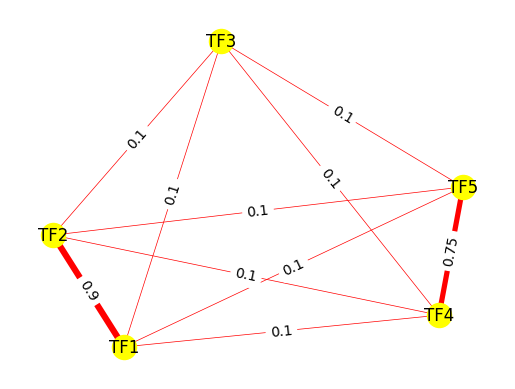

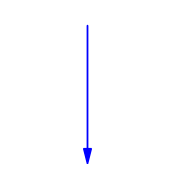

:) 1 new nodes added to network based on gene expression data ['TF6']
Please note that the testing Mean Square Error (MSE) is 0.10939471847175698


,TF1,TF2,TF3,TF4,TF5,TF6
TF1,4.512391,0.856197,-0.515540,-0.262458,-2.315411,-1.166994
TF2,0.856197,1.644936,-0.342697,0.169874,-0.570895,-0.494075
TF3,-0.515540,-0.342697,84.228863,-0.470847,-0.618672,-16.642297
TF4,-0.262458,0.169874,-0.470847,1.218198,0.070268,-0.619841
TF5,-2.315411,-0.570895,-0.618672,0.070268,2.505441,-0.163531
TF6,-1.166994,-0.494075,-16.642297,-0.619841,-0.163531,84.577403


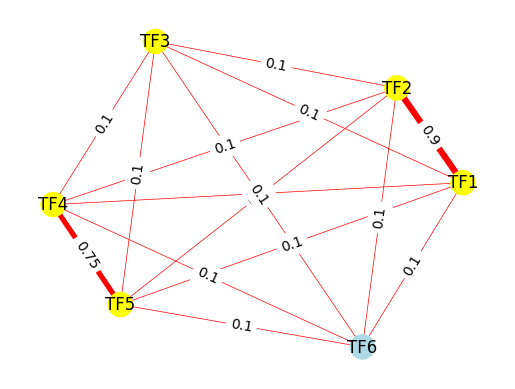

In [1]:
# Fitting the gregulnet model on training data: X_train and y_train:
netrem_demo.fit(X_train, y_train)

pred_y_test = netrem_demo.predict(X_test) # predicted values for y_test
mse_test = netrem_demo.test_mse(X_test, y_test)
print(f"Please note that the testing Mean Square Error (MSE) is {mse_test}")

# To view and extract the predicted model coefficients for the predictors: 
netrem_demo.model_coef_df

netrem_demo.B_interaction_df